Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [1]:
from random import random, seed
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from tqdm.auto import tqdm

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [2]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.2 
NSTEPS = 10000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [3]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [4]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [5]:
def generate_sets(UNIVERSE_SIZE: int, NUM_SETS: int, density: float):
    rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * density)]))
    sets = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < density
    for s in range(UNIVERSE_SIZE):
        if not np.any(sets[:, s]):
            sets[np.random.randint(NUM_SETS), s] = True
    COSTS = np.pow(sets.sum(axis=1), 1.1)
    return (rng, sets, COSTS)

In [6]:
"""
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), -cost(solution)
"""

'\n# A dumb solution of "all" sets\nsolution = np.full(NUM_SETS, True)\nvalid(solution), cost(solution)\n\n# A random solution with random 50% of the sets\nsolution = rng.random(NUM_SETS) < .5\nvalid(solution), -cost(solution)\n'

In [7]:
def single_mutation_tweak(solution: np.ndarray) -> np.ndarray:
    """Tweaks the solution by flipping a random set, i.e. not taking it if it was taken and vice versa"""
    new_sol = solution.copy()
    idx = rng.integers(NUM_SETS)
    new_sol[idx] = not new_sol[idx]
    return new_sol

def multi_mutation_tweak(solution: np.ndarray) -> np.ndarray:

    new_sol = solution.copy()
    """Create a random mask of sets to be flipped and apply it to the solution,
        If the mask is True and the set is already taken -> true to false
        If the mask is True and the set is not taken -> false to true"""
    
    #while solution is the same as the new solution, keep generating new solutions
    while np.all(new_sol == solution):
        mask = rng.random(NUM_SETS) < 0.01
        new_sol = np.logical_xor(new_sol, mask)

    return new_sol

def multi_tweak_no_mask(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    index = None
    while index is None or np.random.random() < 0.2:
        index = rng.integers(0, NUM_SETS)
        new_sol[index] = not new_sol[index]
    
    return new_sol



In [8]:
def fitness(solution: np.ndarray) -> float:
    """Returns the fitness of a solution"""
    return (valid(solution), -cost(solution))

## Hill Climber with random multi tweak

In [ ]:


#Vector of all false
solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(solution)
ic(solution_fitness)
full_history = [(-cost(solution), 1)]
bettering_history = [(-cost(solution), 1)]

tweak = multi_tweak_no_mask
for steps in tqdm(range(NSTEPS)):
    new_solution = tweak(solution)
    full_history.append((-cost(new_solution), 1))
    #if new solution is better than last one take it
    if fitness(new_solution) > fitness(solution):
        solution = new_solution
    bettering_history.append((-cost(solution), 1))



ic(fitness(solution))
ic(valid(solution))
linspace = np.linspace(0, 1, len(full_history))  # Adjust linspace length
#reduce point size
plt.scatter(linspace, [x[0] for x in full_history], color='red', s=0.1)
linspace = np.linspace(0, 1, len(bettering_history))  # Adjust linspace length
plt.plot(linspace, [x[0] for x in bettering_history], color='blue')
#build legend
plt.legend(['current', 'best'])
#save top solution as a png
file_name = 'Multi_Tweak_' + str(UNIVERSE_SIZE) + '_' + str(NUM_SETS) + '_' + str(DENSITY) + '_' + str(NSTEPS) + '.png'
plt.savefig(file_name)
plt.show()
#plot as points




ic| solution_fitness: (np.True_, np.float64(-538428629.2214441))


  0%|          | 0/10000 [00:00<?, ?it/s]

## Hill Climber with multi random tweaks and simulated annhealing

ic| solution_fitness: (np.True_, np.float64(-841096781.4495196))


  0%|          | 0/10000 [00:00<?, ?it/s]

ic| 'Accepted worsening solution'
ic| 'Accepted worsening solution'
ic| fitness(solution): (np.True_, np.float64(-295035730.38710594))
ic| valid(solution): np.True_


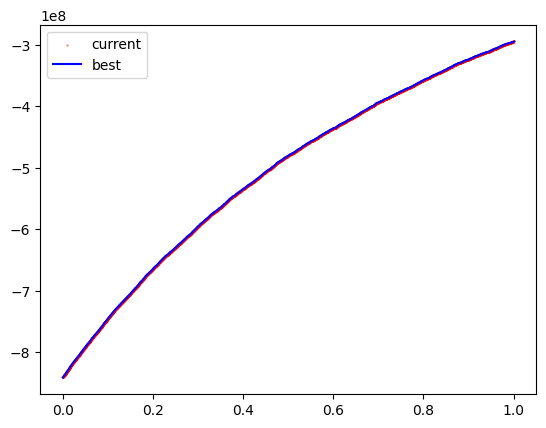

In [234]:

#Vector of all false
solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(solution)
ic(solution_fitness)
full_history = [(-cost(solution), 1)]
bettering_history = [(-cost(solution), 1)]

tweak = multi_tweak_no_mask
for steps in tqdm(range(NSTEPS)):
    new_solution = tweak(solution)
    new_fitness = fitness(new_solution)
    current_fitness = fitness(solution)

    #if the new solution is better than the current one, accept it
    # else if the acceptance probability is greater than a random number between 0 and 1,
    # accept the new solution
    if new_fitness > current_fitness:
        solution = new_solution
        bettering_history.append((-cost(solution), 1))
    else:
        #put a lower bound on min temperature, that is decreasing with the number of steps
        # from 1 to 0.01
        temperature = max(0.01, 1 - steps / NSTEPS )
        # Calculate acceptance probability
        # Solution needs to be valid if the starting one was valid
        if(new_fitness[0] == current_fitness[0] or new_fitness[0] == True):
            acceptance_probability = np.exp((new_fitness[1] - current_fitness[1]) / temperature)
            if acceptance_probability > rng.random():
                ic("Accepted worsening solution")
                solution = new_solution
                bettering_history.append((-cost(solution), 1))
            else:
                bettering_history.append((-cost(solution), 1))
    
    full_history.append((-cost(solution), 1))


#save top solution as a numpy file
file_name = 'top_solution_' + str(UNIVERSE_SIZE) + '_' + str(NUM_SETS) + '_' + str(DENSITY) + '2.png'

ic(fitness(solution))
ic(valid(solution))
linspace = np.linspace(0, 1, len(full_history))  # Adjust linspace length
#reduce point size
plt.scatter(linspace, [x[0] for x in full_history], color='red', s=0.1)
linspace = np.linspace(0, 1, len(bettering_history))  # Adjust linspace length
plt.plot(linspace, [x[0] for x in bettering_history], color='blue')
#build legend
plt.legend(['current', 'best'])
#save top solution as a png
file_name = 'Simulated_Annealing_' + str(UNIVERSE_SIZE) + '_' + str(NUM_SETS) + '_' + str(DENSITY) + '_' + str(NSTEPS) + '.png'
plt.savefig(file_name)
plt.show()


In [235]:

# After nsets steps of minimal improving: less than 1 unit improvement
# Get a new starting position, calculated from the last solution, with
# a powered random tweak (10 times more likely to flip a set)

def powered_tweak(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    #temp is an invalid solution (all zeros)
    temp = np.zeros(NUM_SETS, dtype=bool)
    """Create a random mask of sets to be flipped and apply it to the solution,
        If the mask is True and the set is already taken -> true to false
        If the mask is True and the set is not taken -> false to true"""
    while not valid(temp):
        mask = rng.random(NUM_SETS) < 0.1
        temp = np.logical_xor(new_sol, mask)
        #if the starting solution is invalid, return tweaked one anyway
        if fitness(solution)[0] == False:
            return temp

    new_sol = temp
    return new_sol

def new_starting_position(last: np.ndarray) -> np.ndarray:
    """Returns a new starting position for the solution"""
    #flip a set with power_tweak
    new = powered_tweak(last)

    return new

## Hill Climber with random multi mutation tweak and Iterated Local Search
Steepest step w n = 5

ic| solution_fitness: (np.True_, np.float64(-841096781.4495196))


  0%|          | 0/3000 [00:00<?, ?it/s]

ic| "Approximated Local Minima": 'Approximated Local Minima'
    sol_n: 1
    fitness(sol): (np.True_, np.float64(-465478795.8776023))
ic| "Approximated Local Minima": 'Approximated Local Minima'
    sol_n: 2
    fitness(sol): (np.True_, np.float64(-599642593.4959936))


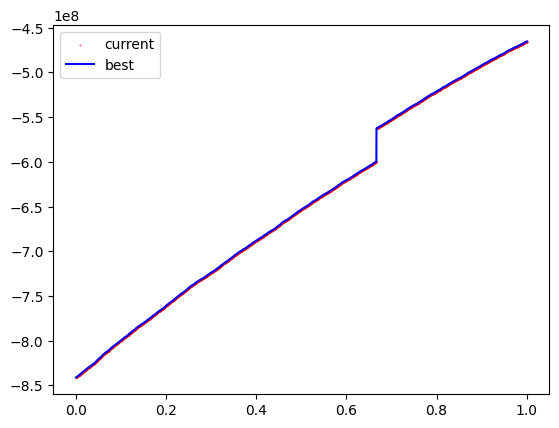

In [236]:


#How many steps to wait for a new starting position
# with NSTEPS is just a steepest step = 5
MAX_ITERATIONS = 5
CHANGE_STEPS = NSTEPS/MAX_ITERATIONS
NSTEPS = 3000

CHANGE_COST = (np.average(COSTS)/UNIVERSE_SIZE)

#Vector of all true
solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(solution)
ic(solution_fitness)
full_history = [(-cost(solution), 1)]
bettering_history = [(-cost(solution), 1)]

#Iterated Local search
tweak = multi_tweak_no_mask
change_quantity = []
change_steps = 0
top_solution = []


for steps in tqdm(range(NSTEPS)):
    #compute ten new solutions and take the best one

    new_solution = [tweak(solution) for _ in range(3)]
    new_solution = sorted(new_solution, key=lambda x: fitness(x), reverse=True)[0]
    full_history.append((-cost(new_solution), 1))
    #if new solution is better than last one take it
    if fitness(new_solution) > fitness(solution):
        solution = new_solution
        change_quantity.append(-cost(new_solution) + cost(solution))
    else:
        change_quantity.append(0)
    change_steps += 1


    # If in the last 100 steps the improvement was less than average cost of sets
    #  get a new starting position, else remove the first cost of the vector
    #  and shift the rest of the vector to the left

    if change_steps == CHANGE_STEPS:
        if sum(change_quantity) < CHANGE_COST:
            top_solution.append(solution)
            solution = new_starting_position(solution)
            
            change_quantity = []
            change_steps = 0
        else:
            change_quantity.pop(0)
            change_steps -= 1
    
    bettering_history.append((-cost(solution), 1))

top_solution.append(solution)
#sort top solutions for fitness
top_solution = sorted(top_solution, key=lambda x: fitness(x), reverse=True)
sol_n = 1
for sol in top_solution:
    ic("Approximated Local Minima", sol_n, fitness(sol))
    sol_n += 1

#save plot
file_name = 'top_solution_' + str(UNIVERSE_SIZE) + '_' + str(NUM_SETS) + '_' + str(DENSITY) + '3.png'

linspace = np.linspace(0, 1, len(full_history))  # Adjust linspace length
#plot all points
plt.scatter(linspace, [x[0] for x in full_history], color='red', s=0.1)
linspace = np.linspace(0, 1, len(bettering_history))  # Adjust linspace length
plt.plot(linspace, [x[0] for x in bettering_history], color='blue')
#build legend
plt.legend(['current', 'best'])
#save top solution as a png
file_name = 'Iterated_Local_Search_' + str(UNIVERSE_SIZE) + '_' + str(NUM_SETS) + '_' + str(DENSITY) + '_' + str(NSTEPS) + '.png'
plt.savefig(file_name)
plt.show()


## Hill Climbing with Iterated Local Search and Tabu search

In [237]:

""" Not a substantial improvement, the search space is too large
#Taboo map
tabu_map = {}
tabu_map.update({hash(str(solution)): 1})
"""

' Not a substantial improvement, the search space is too large\n#Taboo map\ntabu_map = {}\ntabu_map.update({hash(str(solution)): 1})\n'